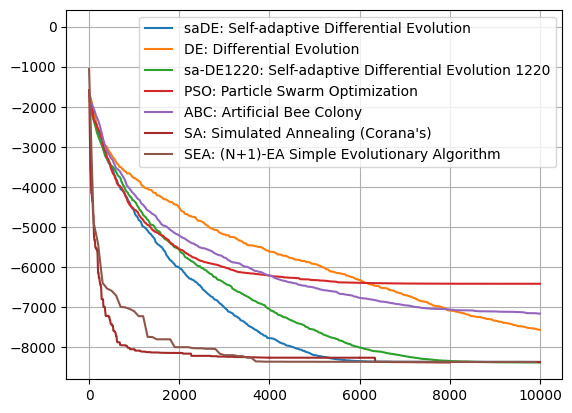

In [2]:
import pygmo as pg
import numpy as np
import matplotlib.pyplot as plt
# The user-defined problem
udp = pg.schwefel(dim = 20)
# The pygmo problem
prob = pg.problem(udp)

# For a number of generation based algorithms we can use a similar script to run and average over 25 runs.
udas = [pg.sade(gen=500), pg.de(gen=500), pg.de1220(gen=500), pg.pso(gen=500), pg.bee_colony(gen=250, limit=20)]
for uda in udas:
    logs = []
    for i in range(25):
        algo = pg.algorithm(uda)
        algo.set_verbosity(1) # regulates both screen and log verbosity
        pop = pg.population(prob, 20)
        pop = algo.evolve(pop)
        logs.append(algo.extract(type(uda)).get_log())
    logs = np.array(logs)
    avg_log = np.average(logs,0)
    plt.plot(avg_log[:,1],avg_log[:,2]-418.9829*20 , label=algo.get_name())

# For simulated annealing, since we will be using some reannealing we have to code a different script (and we will
# also not take any average for brevity)
logs = []
algo = pg.algorithm(pg.simulated_annealing(10, 0.01, 5))
algo.set_verbosity(10)
pop = pg.population(prob, 20)
for i in range(5):
    pop = algo.evolve(pop)
    logs.append(algo.extract(pg.simulated_annealing).get_log())
for i in range(5):
     plt.plot([l[0]+2000*i for l in logs[i]],[l[1]-418.9829*20 for l in logs[i]],"brown")
plt.plot([0,0],[1,1],"brown", label=algo.get_name())

# For the simple evolutionary startegy we also need ad hoc code
logs = []
algo = pg.algorithm(pg.sea(gen = 10000))
algo.set_verbosity(100)
pop = pg.population(prob, 1)
pop = algo.evolve(pop)
logs = algo.extract(pg.sea).get_log()
plt.plot([l[1] for l in logs],[l[2]-418.9829*20 for l in logs], label = algo.get_name())

# We then add details to the plot
plt.legend()
plt.yticks([-8000,-7000,-6000,-5000,-4000,-3000,-2000,-1000,0])
plt.grid()